# Superconductivity Data Analysis
### Goal: Predict the critical temperature based on the features extracted.

In [216]:
# Import packages.
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# # Dimensionality reduction 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# from sklearn.manifold import TSNE

# Feature selection


# Regression 

# # Model Evaluation
from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


# from sklearn.linear_model import LinearRegression
# from sklearn import svm 
# from sklearn.neural_network import MLPRegressor

## Table of Contents
* [Data Preprocessing](#Data-Preproccesing)
* [Exploratory Data Analysis & Visualizations](#Exploratory-Data-Analysis-&-Visualizations)
* [Classification](#Classification)

## Data Preprocessing

In [2]:
# Read the data.
df1 = pd.read_csv('./data/superconductivity_train.csv')
df2 = pd.read_csv('./data/superconductivity_unique_m.csv')
df = pd.concat([df1,df2.drop(['critical_temp','material'],axis=1)],axis=1)

In [3]:
df1.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [4]:
df2.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [32]:
# Split into training and response variables
X = df.drop('critical_temp',axis=1)
y = df['critical_temp']

## Exploratory Data Analysis & Visualizations

#### Features in the First Dataset

In [6]:
tmp = df1.columns.tolist()
tmp.sort()
tmp

['critical_temp',
 'entropy_Density',
 'entropy_ElectronAffinity',
 'entropy_FusionHeat',
 'entropy_ThermalConductivity',
 'entropy_Valence',
 'entropy_atomic_mass',
 'entropy_atomic_radius',
 'entropy_fie',
 'gmean_Density',
 'gmean_ElectronAffinity',
 'gmean_FusionHeat',
 'gmean_ThermalConductivity',
 'gmean_Valence',
 'gmean_atomic_mass',
 'gmean_atomic_radius',
 'gmean_fie',
 'mean_Density',
 'mean_ElectronAffinity',
 'mean_FusionHeat',
 'mean_ThermalConductivity',
 'mean_Valence',
 'mean_atomic_mass',
 'mean_atomic_radius',
 'mean_fie',
 'number_of_elements',
 'range_Density',
 'range_ElectronAffinity',
 'range_FusionHeat',
 'range_ThermalConductivity',
 'range_Valence',
 'range_atomic_mass',
 'range_atomic_radius',
 'range_fie',
 'std_Density',
 'std_ElectronAffinity',
 'std_FusionHeat',
 'std_ThermalConductivity',
 'std_Valence',
 'std_atomic_mass',
 'std_atomic_radius',
 'std_fie',
 'wtd_entropy_Density',
 'wtd_entropy_ElectronAffinity',
 'wtd_entropy_FusionHeat',
 'wtd_entropy

#### Distribution of Response Variable

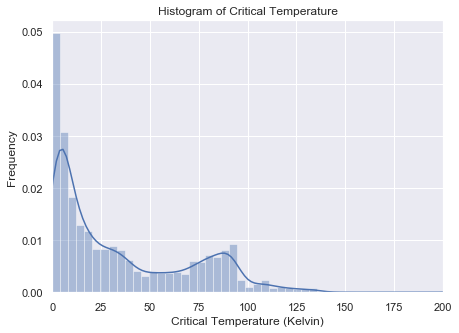

In [7]:
plt.figure(figsize=(7,5))
#plt.hist(y)
sns.distplot(y)
plt.xlim(0,200)
plt.xlabel('Critical Temperature (Kelvin)')
plt.ylabel('Frequency')
plt.title('Histogram of Critical Temperature')
plt.show()

#### Correlation Clustermap

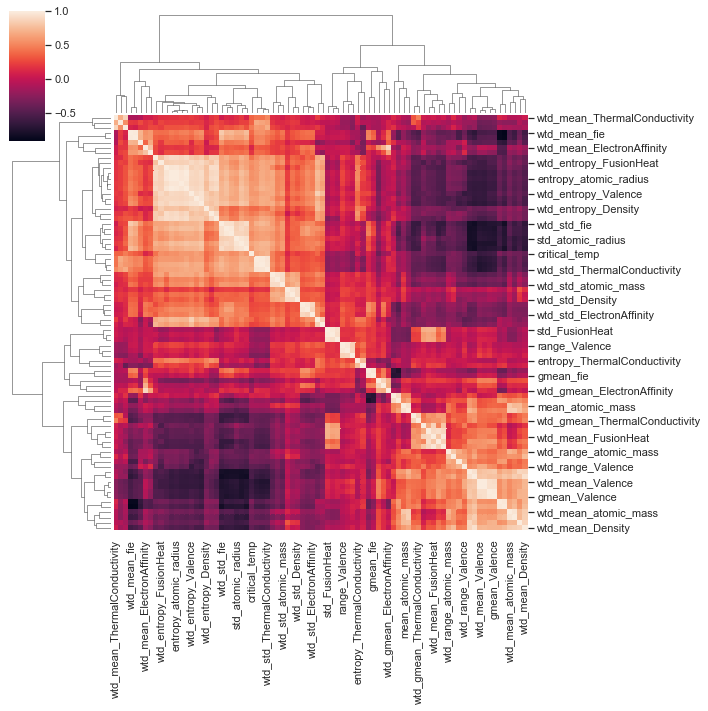

In [8]:
sns.clustermap(df1.corr())
plt.show()

#### Correlation with Response Variable

In [9]:
corr = df.corr()

# Correlation with critical temperature (response variable)
corr_response = corr['critical_temp']

# Select highly correlated features
relevant_feat = corr_response[(abs(corr_response) > 0.5) & (corr_response.index != 'critical_temp')]
print(relevant_feat)
print("There are " + str(len(relevant_feat)) 
      + " features where the absolute value of the correlation coefficient if greater than 0.5.")

number_of_elements             0.601069
entropy_atomic_mass            0.543619
wtd_entropy_atomic_mass        0.626930
entropy_fie                    0.567817
range_fie                      0.600790
std_fie                        0.541804
wtd_std_fie                    0.582013
entropy_atomic_radius          0.558937
wtd_entropy_atomic_radius      0.603494
range_atomic_radius            0.653759
std_atomic_radius              0.559629
wtd_std_atomic_radius          0.599199
gmean_Density                 -0.541684
wtd_gmean_Density             -0.540046
entropy_FusionHeat             0.552709
wtd_entropy_FusionHeat         0.563244
range_ThermalConductivity      0.687654
std_ThermalConductivity        0.653632
wtd_std_ThermalConductivity    0.721271
mean_Valence                  -0.600085
wtd_mean_Valence              -0.632401
gmean_Valence                 -0.573068
wtd_gmean_Valence             -0.615653
entropy_Valence                0.598591
wtd_entropy_Valence            0.589664


In [10]:
max_corr = relevant_feat[relevant_feat == max(relevant_feat)]
print('Largest positive correlation feature: ' + max_corr.index[0])
print('Largest positive correlation value: ' + str(max_corr.values[0]))
print('\n')
min_corr = relevant_feat[relevant_feat == min(relevant_feat)]
print('Largest negative correlation feature: ' +  min_corr.index[0])
print('Largest negative correlation value: ' +  str(min_corr.values[0]))

Largest positive correlation feature: wtd_std_ThermalConductivity
Largest positive correlation value: 0.721271079183476


Largest negative correlation feature: wtd_mean_Valence
Largest negative correlation value: -0.6324010170934301


#### Boxplot of number of elements vs critical temperature

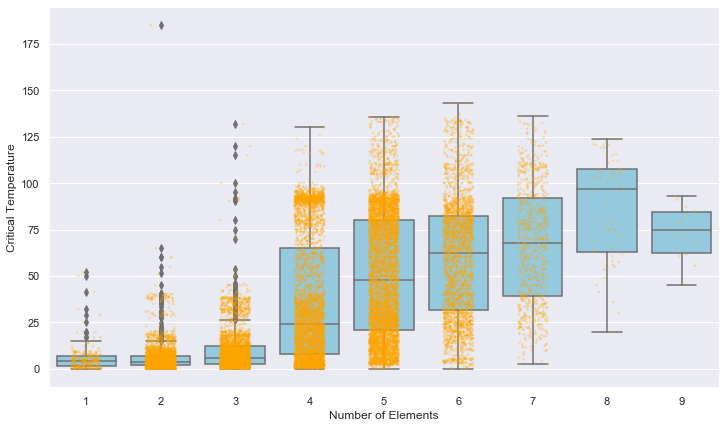

In [12]:
number_of_elements_ls = [str(i) for i in df['number_of_elements']]
ct_elements_df = pd.DataFrame({'number_of_elements':number_of_elements_ls,
                               'critical_temp': list(df['critical_temp'])})

plt.figure(figsize=(12,7))
sns.boxplot(x='number_of_elements', y='critical_temp', data=ct_elements_df, color='skyblue') #palette="Blues")
sns.stripplot(x='number_of_elements', y='critical_temp', data=ct_elements_df, color="orange", jitter=0.2, size=2.5, alpha=0.3)
plt.xlabel('Number of Elements')
plt.ylabel('Critical Temperature')
plt.show()

#### Histogram of Select Features

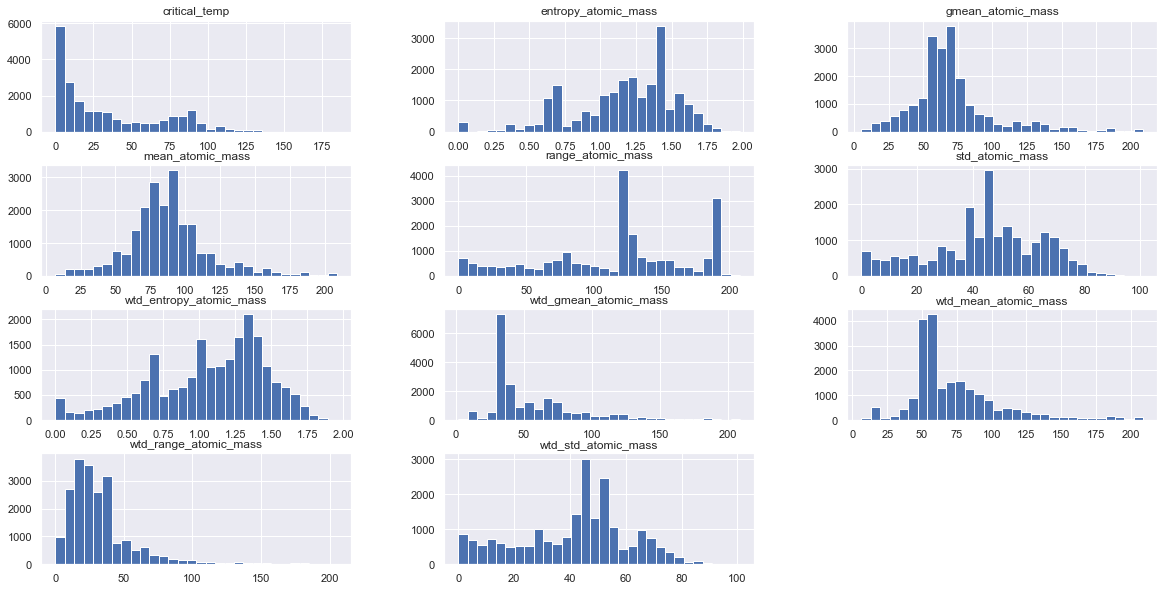

In [13]:
# Get indices of columns for atomic mass and critical temp
col = df1.columns.tolist()
am_ind = [col.index(i) for i in col if i.find('atomic_mass')!=-1] + [col.index('critical_temp')]
am = df1.iloc[:,am_ind]
am.hist(bins=30, figsize=(20, 10))
plt.show()

In [59]:
print(list(df.columns))

['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass', 'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie', 'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie', 'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie', 'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius', 'wtd_gmean_atomic_radius', 'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'range_atomic_radius', 'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius', 'mean_Density', 'wtd_mean_Density', 'gmean_Density', 'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density', 'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density', 'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity', 'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity', 'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffini

#### Jointplots of Highly Correlated Features

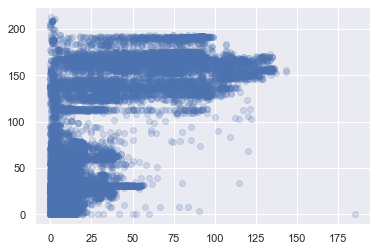

In [44]:
plt.scatter(df['critical_temp'],df['wtd_std_ThermalConductivity'],alpha=0.2)

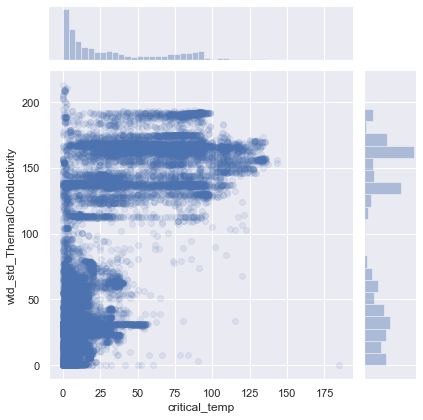

In [47]:
sns.jointplot(df['critical_temp'],df['wtd_std_ThermalConductivity'],alpha=0.1)

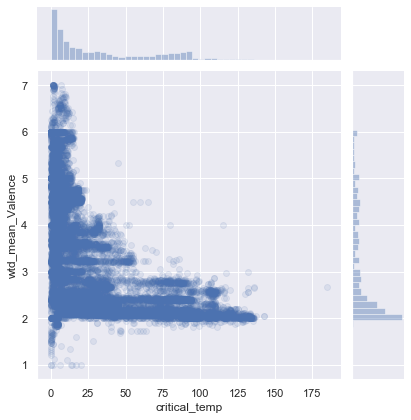

In [46]:
sns.jointplot(df['critical_temp'],df['wtd_mean_Valence'],alpha=0.1)

#### Reduce Dimensions and Visualize

In [16]:
# Reduce the dimensions
pca = PCA(n_components=5)
pca_fit = pca.fit_transform(X_n)
pca_fit_df = pd.DataFrame(pca_fit, columns = ['pc1','pc2','pc3','pc4','pc5'])
pca_df = pd.concat([pca_fit_df, df[['critical_temp']]], axis = 1)

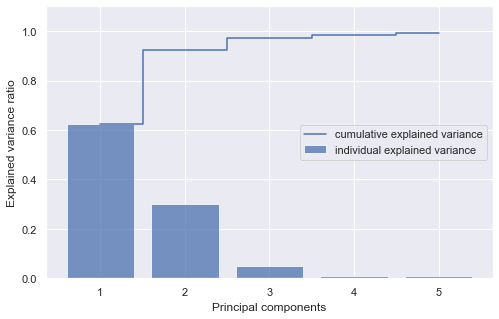

In [17]:
plt.figure(figsize=(8,5))
exp_var = pca.explained_variance_ratio_
cum_exp_var = np.cumsum(exp_var)

plt.bar(range(1, 6), exp_var, alpha=0.75, align='center',
        label='individual explained variance')
plt.step(range(1, 6), cum_exp_var, where='mid',
         label='cumulative explained variance')
plt.ylim(0, 1.1)
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.show()

In [28]:
np.log(df['critical_temp'])

0        3.367296
1        3.258097
2        2.944439
3        3.091042
4        3.135494
           ...   
21258    0.891998
21259    4.804840
21260    0.683097
21261    0.609766
21262    2.549445
Name: critical_temp, Length: 21263, dtype: float64

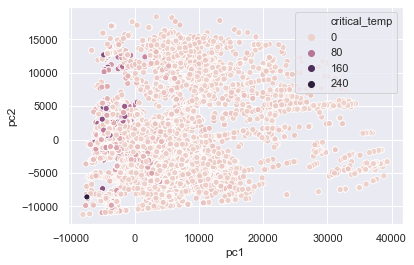

In [30]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(X_n)
pca_fit_df = pd.DataFrame(pca_fit, columns = ['pc1','pc2'])
pca_df = pd.concat([pca_fit_df, df['critical_temp']], axis = 1)

sns.scatterplot(x='pc1',y='pc2',data=pca_df,hue='critical_temp')

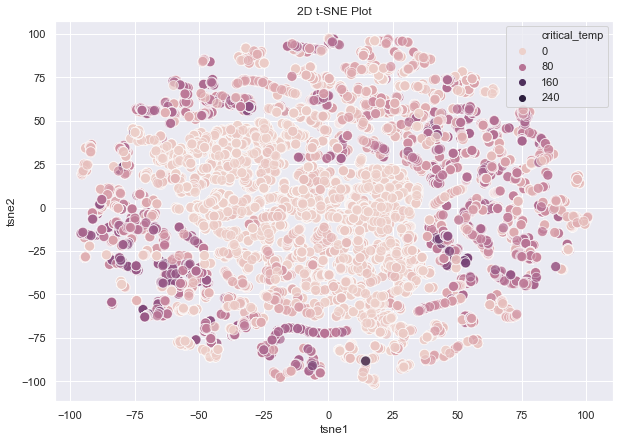

In [31]:
# Perform t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate = 200)
tsne_results = tsne.fit_transform(X_n)
tsne1, tsne2 = tsne_results[:, 0], tsne_results[:, 1]
tsne_df = pd.DataFrame(dict(tsne1=tsne1, tsne2=tsne2, critical_temp=df['critical_temp']))

# Plot t-SNE
plt.figure(figsize=(10,7))
ax = sns.scatterplot(x='tsne1', y='tsne2', hue='critical_temp', data=tsne_df, s = 100, alpha = 0.7)
plt.title('2D t-SNE Plot')
plt.show()

## Regression

#### Feature Engineering

In [132]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

In [180]:
# Normalize the data
#X_n = StandardScaler().fit_transform(X)
X = df.drop('critical_temp',axis=1)
y = df['critical_temp']

# Feature selection - embedded method
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) 
      + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Best alpha using built-in LassoCV: 73.532006
Best score using built-in LassoCV: 0.597182
Lasso picked 14 variables and eliminated the other 153 variables


In [181]:
nonzero_coef

range_atomic_mass               0.039758
range_fie                       0.013735
range_atomic_radius             0.044791
wtd_mean_Density                0.000669
gmean_Density                  -0.001016
wtd_gmean_Density               0.000343
range_Density                   0.001648
wtd_range_Density              -0.000424
std_Density                    -0.000524
wtd_std_Density                -0.004903
gmean_ElectronAffinity         -0.032958
wtd_gmean_ElectronAffinity     -0.077968
wtd_mean_ThermalConductivity    0.014114
wtd_std_ThermalConductivity     0.266472
dtype: float64

wtd_gmean_ElectronAffinity     -0.077968
gmean_ElectronAffinity         -0.032958
wtd_std_Density                -0.004903
gmean_Density                  -0.001016
std_Density                    -0.000524
wtd_range_Density              -0.000424
wtd_gmean_Density               0.000343
wtd_mean_Density                0.000669
range_Density                   0.001648
range_fie                       0.013735
wtd_mean_ThermalConductivity    0.014114
range_atomic_mass               0.039758
range_atomic_radius             0.044791
wtd_std_ThermalConductivity     0.266472
dtype: float64


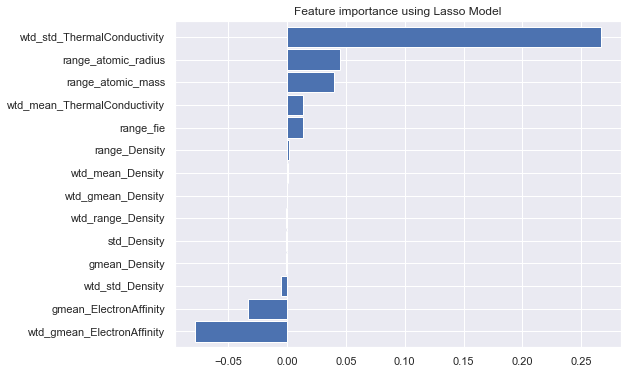

In [182]:
imp_coef = coef[coef!=0].sort_values()
print(imp_coef)
plt.rcParams['figure.figsize'] = (8,6)
imp_coef.plot(kind = "barh",width=0.9)
plt.title("Feature importance using Lasso Model")
plt.show()

In [183]:
X_new = X[imp_coef.index]
np.shape(X_new)

(21263, 14)

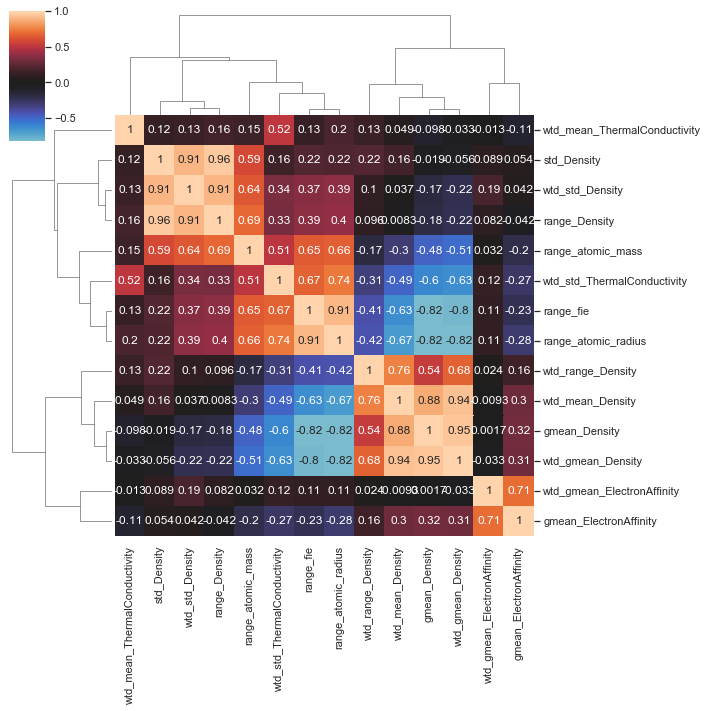

In [194]:
sns.clustermap(X_new.corr(),annot=True,center=0)
plt.show()

#### Train Test Split & Feature Scaling

In [184]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=1)

# Fit on training set
scaler = StandardScaler()
scaler.fit(X_train)

# Apply transform to both the training set and the test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Selecting a Model
* Linear Regression
* Support Vector Machine Regression

In [229]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import RandomizedSearchCV

In [221]:
model_names = ['Linear Regression',
               'Support Vector Regression',
               'K-nearest Neighbors Regression',
               'Decision Tree Regression',
               'Random Forest Regression',
               'Multi-layer Perceptron Regression']
model_ls = [linear_model.LinearRegression(),
            svm.SVR(),
            KNeighborsRegressor(n_neighbors=2),
            DecisionTreeRegressor(random_state=1),
            RandomForestRegressor(random_state=1),
            MLPRegressor(random_state=1)]

def regr_score(X,y,X_train,y_train,X_test,y_test,model):
    regr = model
    regr.fit(X_train,y_train)
    
    # Get testing and training accuracy
    train_score = regr.score(X_train,y_train)
    test_score = regr.score(X_test,y_test)
    rmse = np.sqrt(mean_squared_error(y_true=y, y_pred=regr.predict(X)))
    
    return {'train_r2':train_score,'test_r2':test_score,'rmse':rmse}

# Get scores for each model  
scores = [regr_score(X_new,y,X_train,y_train,X_test,y_test,i) for i in model_ls]

/Users/christinachang/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [254]:
# Dataframe of training and testing accuracy
scores_df = pd.DataFrame(scores)
scores_df.index = model_names
scores_df.sort_values(by=['rmse'],ascending=True)

,train_r2,test_r2,rmse
Random Forest Regression,0.977155,0.918110,39.022256
Support Vector Regression,0.757310,0.749889,44.106484
K-nearest Neighbors Regression,0.960687,0.898280,45.527629
Decision Tree Regression,0.985734,0.856664,45.779397
Linear Regression,0.612229,0.612878,16037.577812
Multi-layer Perceptron Regression,0.803285,0.796068,72364.185489


#### Random Forest Parameter Tuning

In [241]:
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [250]:
### Number of trees in random forest
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 300, 400, 500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200, 300, 400, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [251]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 25, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.2min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [252]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [262]:
# Compare the models
regr = rf
score = np.sqrt(mean_squared_error(y_true=y, y_pred=regr.predict(X_new)))
print('Pevious Model RMSE: {:0.2f}%.'.format(score))
regr = rf_random.best_estimator_
score = np.sqrt(mean_squared_error(y_true=y, y_pred=regr.predict(X_new)))
print('New Model RMSE: {:0.2f}%.'.format(score))
print()

Pevious Model RMSE: 39.02%.
New Model RMSE: 37.31%.



#### Evaluate the Best Random Forest Model

In [ ]:
cv_score = cross_val_score(model, X_new, y, scoring="neg_mean_squared_error", cv=5)
cv_mean = cv_score.mean()
cv_var = cv_score.var()

#### Residual Plots